**Install requirements**

In [1]:
#This is for time series challenge


In [8]:
!pip install pyramid-arima


  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
  Running setup.py install for pyramid-arima: started
  Running setup.py install for pyramid-arima: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [178 lines of output]
  Partial import of pyramid during the build process.
  
  Requirements: ['Cython>=0.23\nnumpy>=1.10\nscipy>=0.9\nscikit-learn>=0.17\npandas>=0.19\nstatsmodels>=0.9.0\n']
  Adding extra setuptools args
  C:\Users\eias\AppData\Local\Programs\Python\Python39\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
    warnings.warn(
  INFO: blas_opt_info:
  INFO: blas_armpl_info:
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  INFO: customize MSVCCompiler
  INFO:   libraries armpl_lp64_mp not found in ['C:\\Users\\eias\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\', 'C:\\Users\\eias\\AppData\\Local\\Programs\\Python\\Python39\\libs']
  INFO:   NOT AVA

In [2]:
pip install pyramid


     ------------------------------------ 246.6/246.6 KB 841.3 kB/s eta 0:00:00
     -------------------------------------- 115.0/115.0 KB 3.3 MB/s eta 0:00:00
     -------------------------------------- 210.7/210.7 KB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
#!pip uninstall scikit-learn
!pip install scikit-learn

  WARN: Could not locate executable efl
  INFO: customize Gnu95FCompiler
  WARN: Could not locate executable gfortran
  WARN: Could not locate executable f95
  INFO: customize G95FCompiler
  WARN: Could not locate executable g95
  INFO: customize IntelEM64VisualFCompiler
  INFO: customize IntelEM64TFCompiler
  WARN: Could not locate executable efort
  WARN: Could not locate executable efc
  INFO: customize PGroupFlangCompiler
  WARN: Could not locate executable flang
  WARN: don't know how to compile Fortran code on platform 'nt'
  INFO:   NOT AVAILABLE
  INFO:
  INFO: accelerate_info:
  INFO:   NOT AVAILABLE
  INFO:
  INFO: atlas_3_10_blas_threads_info:
  INFO: Setting PTATLAS=ATLAS
  INFO:   libraries tatlas not found in ['C:\\Users\\eias\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'C:\\', 'C:\\Users\\eias\\AppData\\Local\\Programs\\Python\\Python39\\libs']
  INFO:   NOT AVAILABLE
  INFO:
  INFO: atlas_3_10_blas_info:
  INFO:   libraries satlas not found in ['C:\\Users\\eias\\

In [4]:
!pip install chart_studio

     -------------------------------------- 64.4/64.4 KB 694.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 15.2/15.2 MB 2.9 MB/s eta 0:00:00
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=8a7fb75ba0c6442ffee421cd6e630f4781f4f5597cefd10583b05dcba2300bbd
  Stored in directory: c:\users\eias\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [6]:
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 2.7 MB/s eta 0:00:00


In [10]:
pip install pmdarima

     -------------------------------------- 601.9/601.9 KB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install pmdarima
import pmdarima
from pmdarima import auto_arima

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import chart_studio.plotly as plot_mpl
import plotly.graph_objs as go
import xgboost as xgb
import keras.backend as K
import tensorflow as tf

from math import sqrt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
#from pyramid.arima import auto_arima

from socket import socket
from statsmodels.tsa.seasonal import seasonal_decompose

from keras.models import Sequential
from keras.layers import Conv1D, LSTM, TimeDistributed, Dense
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


In [7]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [8]:
# Load Train dataset
train = pd.read_csv("../ds_takehome_task/train.csv")
train.head(5).append(train.tail(5))

C:\Users\eias\AppData\Local\Temp\ipykernel_1032\3869612840.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train.head(5).append(train.tail(5))


,productsGroup_key,date_key,quantitySales
0,1,20190902,26784.0
1,1,20190903,7432.0
2,1,20190904,1424.0
3,1,20190905,608.0
4,1,20190906,776.0
242395,297,20211123,18.0
242396,297,20211124,16.0
242397,297,20211125,16.0
242398,297,20211126,16.0
242399,297,20211127,38.0


<AxesSubplot:>

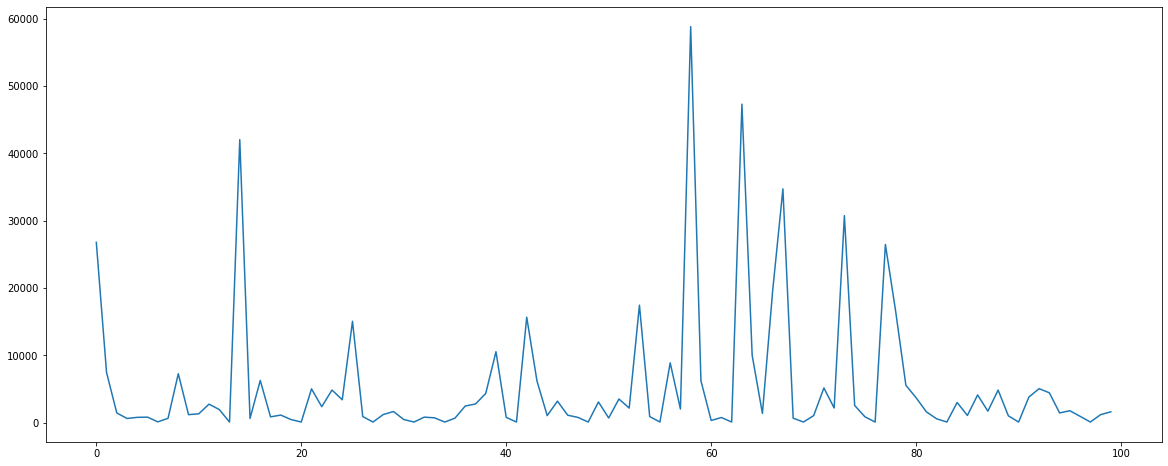

In [10]:
#Plot data
train[:100].quantitySales.plot(figsize=(20,8))

In [11]:
train.shape


(242400, 3)

In [12]:
train.dtypes


productsGroup_key      int64
date_key               int64
quantitySales        float64
dtype: object

In [13]:
train = train.set_index(['date_key'])
train.index = pd.to_datetime(train.index)
train.dtypes


productsGroup_key      int64
quantitySales        float64
dtype: object

In [14]:
train.head()

,productsGroup_key,quantitySales
date_key,,
1970-01-01 00:00:00.020190902,1,26784.0
1970-01-01 00:00:00.020190903,1,7432.0
1970-01-01 00:00:00.020190904,1,1424.0
1970-01-01 00:00:00.020190905,1,608.0
1970-01-01 00:00:00.020190906,1,776.0


In [15]:
#Stationary Control
#if P-Value is smaller than 0.005, we can say that there is stationary, else there is no stationary
#if our data has no stationary, I will plan to use differences

class Stationary:
    def __init__(self, significance=.005):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None

    def ADF_Stationarity_Test(self, timeseries, printResults=True):

        # Dickey-Fuller test:
        print(timeseries)
        try:
            adfTest = adfuller(timeseries, autolag='AIC')

            self.pValue = adfTest[1]

            if (self.pValue < self.SignificanceLevel):
                self.isStationary = True
            else:
                self.isStationary = False
            #self.isStationary=True
            if printResults:
                dfResults = pd.Series(adfTest[0:4],
                                      index=['ADF Test Statistic', 'P-Value', '# Lags Used', '# Observations Used'])

                # Add Critical Values
                for key, value in adfTest[4].items():
                    dfResults['Critical Value (%s)' % key] = value

                print('Augmented Dickey-Fuller Test Results:')
                print(dfResults)
        except Exception as e:
          print(e)
          self.isStationary = False

In [16]:
sTest = Stationary()


In [23]:
productsGroup_key_list = range(1,10)
for i in range(len(productsGroup_key_list)):
    sTest.ADF_Stationarity_Test(train[train.productsGroup_key == i]['quantitySales'])
    print(sTest.isStationary)

Series([], Name: quantitySales, dtype: float64)
sample size is too short to use selected regression component
False
date_key
1970-01-01 00:00:00.020190902    26784.0
1970-01-01 00:00:00.020190903     7432.0
1970-01-01 00:00:00.020190904     1424.0
1970-01-01 00:00:00.020190905      608.0
1970-01-01 00:00:00.020190906      776.0
                                  ...   
1970-01-01 00:00:00.020211123     3160.0
1970-01-01 00:00:00.020211124     6824.0
1970-01-01 00:00:00.020211125     6376.0
1970-01-01 00:00:00.020211126     8560.0
1970-01-01 00:00:00.020211127      576.0
Name: quantitySales, Length: 818, dtype: float64
Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -3.612913
P-Value                   0.005519
# Lags Used              14.000000
# Observations Used     803.000000
Critical Value (1%)      -3.438520
Critical Value (5%)      -2.865146
Critical Value (10%)     -2.568690
dtype: float64
False
date_key
1970-01-01 00:00:00.020190901     128.0
1970-01-01 00:00:00.02

In [17]:
sTest.ADF_Stationarity_Test(train[train.productsGroup_key == 1]['quantitySales'])
print(sTest.isStationary)

date_key
1970-01-01 00:00:00.020190902    26784.0
1970-01-01 00:00:00.020190903     7432.0
1970-01-01 00:00:00.020190904     1424.0
1970-01-01 00:00:00.020190905      608.0
1970-01-01 00:00:00.020190906      776.0
                                  ...   
1970-01-01 00:00:00.020211123     3160.0
1970-01-01 00:00:00.020211124     6824.0
1970-01-01 00:00:00.020211125     6376.0
1970-01-01 00:00:00.020211126     8560.0
1970-01-01 00:00:00.020211127      576.0
Name: quantitySales, Length: 818, dtype: float64
Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -3.612913
P-Value                   0.005519
# Lags Used              14.000000
# Observations Used     803.000000
Critical Value (1%)      -3.438520
Critical Value (5%)      -2.865146
Critical Value (10%)     -2.568690
dtype: float64
False


In [24]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        # print(interval, dataset[i], dataset[i - interval])
        diff.append(value)
    return pd.Series(diff)

In [27]:
diff_values = difference(train[train.productsGroup_key == 1]['quantitySales'], 1)
# split train test datasets
xtrain, xtest = diff_values[0:-9], diff_values[-9:]

In [28]:
xtest


808     2184.0
809    -1664.0
810     -520.0
811    67368.0
812   -64288.0
813     3664.0
814     -448.0
815     2184.0
816    -7984.0
dtype: float64

In [29]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    dfx = pd.DataFrame(data)
    df = dfx.assign(**{
        '{} (t-{})'.format(col, t): dfx[col].shift(t)
        for t in range(lag+1)
        for col in dfx
    })

    df=df.drop([df.columns[0]], axis=1)
    df=df[df.columns[::-1]]
    return df[lag:]

In [30]:
# scale train and test data to [-1, 1] with MinMaxScaler
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler()  
    
    # StandardScaler()
    scaler = scaler.fit(train)

    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    tr_scaled = scaler.transform(train)

    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    ts_scaled = scaler.transform(test)
    
    return scaler, tr_scaled, ts_scaled

In [31]:
# reorganize dataset acording to window size
values_unscaled = np.concatenate((xtrain, xtest))
supervised_raw = timeseries_to_supervised(values_unscaled, 12)

In [32]:
supervised_raw


,0 (t-12),0 (t-11),0 (t-10),0 (t-9),0 (t-8),0 (t-7),0 (t-6),0 (t-5),0 (t-4),0 (t-3),0 (t-2),0 (t-1),0 (t-0)
12,-19352.0,-6008.0,-816.0,168.0,32.0,-704.0,528.0,6624.0,-6080.0,128.0,1432.0,-800.0,-1856.0
13,-6008.0,-816.0,168.0,32.0,-704.0,528.0,6624.0,-6080.0,128.0,1432.0,-800.0,-1856.0,41960.0
14,-816.0,168.0,32.0,-704.0,528.0,6624.0,-6080.0,128.0,1432.0,-800.0,-1856.0,41960.0,-41424.0
15,168.0,32.0,-704.0,528.0,6624.0,-6080.0,128.0,1432.0,-800.0,-1856.0,41960.0,-41424.0,5640.0
16,32.0,-704.0,528.0,6624.0,-6080.0,128.0,1432.0,-800.0,-1856.0,41960.0,-41424.0,5640.0,-5408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,0.0,8704.0,-5304.0,-4648.0,3904.0,396936.0,-390432.0,-10408.0,2184.0,-1664.0,-520.0,67368.0,-64288.0
813,8704.0,-5304.0,-4648.0,3904.0,396936.0,-390432.0,-10408.0,2184.0,-1664.0,-520.0,67368.0,-64288.0,3664.0
814,-5304.0,-4648.0,3904.0,396936.0,-390432.0,-10408.0,2184.0,-1664.0,-520.0,67368.0,-64288.0,3664.0,-448.0
815,-4648.0,3904.0,396936.0,-390432.0,-10408.0,2184.0,-1664.0,-520.0,67368.0,-64288.0,3664.0,-448.0,2184.0


In [33]:
supervised_raw = supervised_raw.values.astype("float32")
supervised_raw


array([[-1.93520e+04, -6.00800e+03, -8.16000e+02, ...,  1.43200e+03,
        -8.00000e+02, -1.85600e+03],
       [-6.00800e+03, -8.16000e+02,  1.68000e+02, ..., -8.00000e+02,
        -1.85600e+03,  4.19600e+04],
       [-8.16000e+02,  1.68000e+02,  3.20000e+01, ..., -1.85600e+03,
         4.19600e+04, -4.14240e+04],
       ...,
       [-5.30400e+03, -4.64800e+03,  3.90400e+03, ..., -6.42880e+04,
         3.66400e+03, -4.48000e+02],
       [-4.64800e+03,  3.90400e+03,  3.96936e+05, ...,  3.66400e+03,
        -4.48000e+02,  2.18400e+03],
       [ 3.90400e+03,  3.96936e+05, -3.90432e+05, ..., -4.48000e+02,
         2.18400e+03, -7.98400e+03]], dtype=float32)

In [34]:
scaler, train_scaled, test_scaled = scale(xtrain.values.reshape(len(xtrain), 1), xtest.values.reshape(len(xtest), 1))
values_scaled = np.concatenate((train_scaled, test_scaled))


In [35]:
supervised = timeseries_to_supervised(values_scaled, 12)

supervised_values = supervised.values.astype('float32')

##split supervised data into train and test-sets
supervised_train, supervised_test = supervised_raw[0:-9], supervised_raw[-9:]
train_scaled, test_scaled = supervised_values[0:-9], supervised_values[-9:]

In [36]:
train_scaled


array([[0.4712917 , 0.4882393 , 0.4948334 , ..., 0.4976885 , 0.49485373,
        0.49351257],
       [0.4882393 , 0.4948334 , 0.49608314, ..., 0.49485373, 0.49351257,
        0.54916126],
       [0.4948334 , 0.49608314, 0.49591044, ..., 0.49351257, 0.54916126,
        0.44325906],
       ...,
       [0.442558  , 0.4949655 , 0.49616444, ..., 0.48996657, 0.5008281 ,
        1.        ],
       [0.4949655 , 0.49616444, 0.49239492, ..., 0.5008281 , 1.        ,
        0.        ],
       [0.49616444, 0.49239492, 0.49806443, ..., 1.        , 0.        ,
        0.48265105]], dtype=float32)

In [37]:
train_X, train_y = train_scaled[:, :-1], train_scaled[:, -1]
test_X, test_y = test_scaled[:, :-1], test_scaled[:, -1]

In [38]:
train_y.reshape(train_y.shape[0], 1)


array([[0.49351257],
       [0.54916126],
       [0.44325906],
       [0.50303286],
       [0.48900133],
       [0.4962051 ],
       [0.49502647],
       [0.4954024 ],
       [0.5021286 ],
       [0.49250668],
       [0.49900937],
       [0.4940409 ],
       [0.5106735 ],
       [0.47789598],
       [0.4948334 ],
       [0.4972821 ],
       [0.49643877],
       [0.49436605],
       [0.49539223],
       [0.49679437],
       [0.4957377 ],
       [0.49507728],
       [0.49660134],
       [0.4981559 ],
       [0.49625587],
       [0.49785107],
       [0.50375426],
       [0.4834842 ],
       [0.49498582],
       [0.5156521 ],
       [0.48383984],
       [0.48932648],
       [0.49860293],
       [0.49321792],
       [0.4954532 ],
       [0.49499598],
       [0.49965963],
       [0.492842  ],
       [0.4994564 ],
       [0.49415267],
       [0.5152864 ],
       [0.47485802],
       [0.4948334 ],
       [0.5070463 ],
       [0.48714197],
       [0.56801903],
       [0.42906493],
       [0.488

In [39]:
# prepare train dataset for lstm
train_X_lstm = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X_lstm = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [40]:
# prepare test dataset for lstm
train_Y_lstm = train_y.reshape((train_y.shape[0], 1, 1))
test_Y_lstm = test_y.reshape((test_y.shape[0], 1, 1))

In [41]:
test_scaled[:, -1]


array([0.49864358, 0.4937564 , 0.49520937, 0.5814308 , 0.41422054,
       0.50052327, 0.4953008 , 0.49864358, 0.48572966], dtype=float32)

In [42]:
train_y


array([0.49351257, 0.54916126, 0.44325906, 0.50303286, 0.48900133,
       0.4962051 , 0.49502647, 0.4954024 , 0.5021286 , 0.49250668,
       0.49900937, 0.4940409 , 0.5106735 , 0.47789598, 0.4948334 ,
       0.4972821 , 0.49643877, 0.49436605, 0.49539223, 0.49679437,
       0.4957377 , 0.49507728, 0.49660134, 0.4981559 , 0.49625587,
       0.49785107, 0.50375426, 0.4834842 , 0.49498582, 0.5156521 ,
       0.48383984, 0.48932648, 0.49860293, 0.49321792, 0.4954532 ,
       0.49499598, 0.49965963, 0.492842  , 0.4994564 , 0.49415267,
       0.5152864 , 0.47485802, 0.4948334 , 0.5070463 , 0.48714197,
       0.56801903, 0.42906493, 0.48837137, 0.4964286 , 0.4950163 ,
       0.555857  , 0.4484612 , 0.48491684, 0.5190254 , 0.51508313,
       0.45260665, 0.49513823, 0.49707887, 0.50109226, 0.4920901 ,
       0.53216285, 0.46005425, 0.4937361 , 0.49487406, 0.5293789 ,
       0.48328102, 0.48187888, 0.49351257, 0.49321792, 0.49455908,
       0.49526015, 0.49955803, 0.4934211 , 0.4997409 , 0.49281

In [43]:
train_y.shape


(796,)

__**XGBRegressor**__

In [44]:
# XGBRegressor Training
now = datetime.now()
print("Process started at : ",now)

parameters = { 'gamma' : [0, 0.1, 0.3, 1], 'learning_rate' : [0.001, 0.01, 0.1], 
              'max_depth' : [2, 4, 6, 7, 12], 
              'n_estimators' : [10, 45, 90, 100, 150, 250],
              'nthread' : [-1], 'reg_alpha' : [1], 'reg_lambda' : [1], 'seed' : [10] }

bst = xgb.XGBRegressor()
xgb_grid = GridSearchCV(bst,
                        parameters,
                        cv=5,
                        n_jobs=-1,
                        verbose=True,
                        )
xgb_grid.fit(train_X, train_y, eval_set=[(train_X, train_y)], early_stopping_rounds=50)

end = datetime.now()
print("Process finished at : ", end)
print("Process took : ", end-now)

Process started at :  2022-05-11 12:43:37.151613
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[0]	validation_0-rmse:0.03316
[1]	validation_0-rmse:0.03290
[2]	validation_0-rmse:0.03262
[3]	validation_0-rmse:0.03242
[4]	validation_0-rmse:0.03218
[5]	validation_0-rmse:0.03200
[6]	validation_0-rmse:0.03186
[7]	validation_0-rmse:0.03168
[8]	validation_0-rmse:0.03158
[9]	validation_0-rmse:0.03143
[10]	validation_0-rmse:0.03135
[11]	validation_0-rmse:0.03125
[12]	validation_0-rmse:0.03112
[13]	validation_0-rmse:0.03106
[14]	validation_0-rmse:0.03097
[15]	validation_0-rmse:0.03091
[16]	validation_0-rmse:0.03082
[17]	validation_0-rmse:0.03077
[18]	validation_0-rmse:0.03071
[19]	validation_0-rmse:0.03064
[20]	validation_0-rmse:0.03061
[21]	validation_0-rmse:0.03055
[22]	validation_0-rmse:0.03052
[23]	validation_0-rmse:0.03048
[24]	validation_0-rmse:0.03045
[25]	validation_0-rmse:0.03040
[26]	validation_0-rmse:0.03038
[27]	validation_0-rmse:0.03033
[28]	validation_0-rmse:0.0303

C:\Users\eias\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [45]:
xgb_grid.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=-1,
             nthread=-1, num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=1, ...)

In [46]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))

    inverted = scaler.inverse_transform(array)
    ##print("converting %s to %s" % (value,inverted[0, -1]))
    return inverted[0, -1]

In [47]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / y_true)) * 100

In [50]:
#Invert scale predictions to time series
predictions = list()
start = 9 # test period
l = len(test_scaled) - start

rmse = []
mape = []

for i in range(len(test_scaled)):
    X1, y = test_scaled[l, 0:-1], test_scaled[l, -1]
    X1 = X1[-12:] # ts_window

    # prediction 
    # pred = predict()
    X1 = X1.reshape((1,-1))
    pred = xgb_grid.predict(X1)

    yhat = invert_scale(scaler, X1[0], pred)
        
    l=l+1

    yhat = inverse_difference(train[train.productsGroup_key == 1]['quantitySales'], yhat, len(test_scaled) + 1 - i) # if not stationary 

    predictions.append(yhat)

    rmse.append(sqrt(mean_squared_error([train[train.productsGroup_key == 1]['quantitySales'][-9:][i]], [yhat])))
    mape.append(mean_absolute_percentage_error([train[train.productsGroup_key == 1]['quantitySales'][-9:][i]], [yhat]))

C:\Users\eias\AppData\Local\Temp\ipykernel_1032\947963087.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(new_row)
C:\Users\eias\AppData\Local\Temp\ipykernel_1032\947963087.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(new_row)
C:\Users\eias\AppData\Local\Temp\ipykernel_1032\947963087.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

In [51]:
print("Test RMSE:", np.mean(rmse))
print("Test MAPE:", np.mean(mape))

Test RMSE: 12480.38707664278
Test MAPE: 515.6434134713917


In [52]:
predictions


[4223.825801372534,
 2756.1410355567996,
 1445.2013683319155,
 4159.202103614814,
 31744.393842220314,
 4783.548519611365,
 9333.97728013993,
 10519.825801372535,
 8586.869184017189]

In [56]:
result_df = train = pd.read_csv("../ds_takehome_task/train.csv")
result_df = result_df[result_df.productsGroup_key == 1]
result_df = result_df[-9:]
result_df.head(9)


,productsGroup_key,date_key,quantitySales
809,1,20211119,2264.0
810,1,20211120,600.0
811,1,20211121,80.0
812,1,20211122,67448.0
813,1,20211123,3160.0
814,1,20211124,6824.0
815,1,20211125,6376.0
816,1,20211126,8560.0
817,1,20211127,576.0


In [57]:
result_df['XGB_Predictions'] = predictions
result_df.head(9)

,productsGroup_key,date_key,quantitySales,XGB_Predictions
809,1,20211119,2264.0,4223.825801
810,1,20211120,600.0,2756.141036
811,1,20211121,80.0,1445.201368
812,1,20211122,67448.0,4159.202104
813,1,20211123,3160.0,31744.393842
814,1,20211124,6824.0,4783.548520
815,1,20211125,6376.0,9333.977280
816,1,20211126,8560.0,10519.825801
817,1,20211127,576.0,8586.869184


<AxesSubplot:>

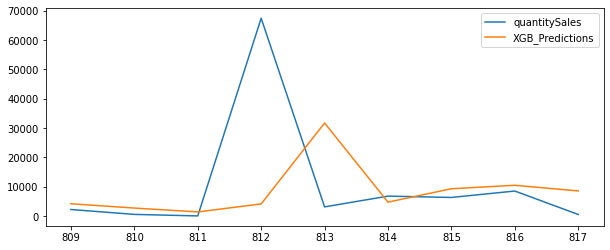

In [59]:
result_df[["quantitySales", "XGB_Predictions"]][:9].plot(figsize=(10,4))
